# Python-1, Лекция 6

Лектор: Петров Тимур

## Исключения и обработка ошибок

Вы все, наверное, сталкивались с ошибками (в жизни и не только), но сегодня будем про Python

Давайте на любимом простом примере - деление на ноль:

In [ ]:
1 / 0

ZeroDivisionError: ignored

Когда мы запускаем рабочий код, но что-то идет не так, как хотелось бы, мы часто увидим вот эти названия типа ZeroDivisionError и так далее

Можно даже прочитать и сразу становится понятно:

![](https://memepedia.ru/wp-content/uploads/2022/03/chto-sluchilos-memy.jpg)

Хорошо, получили ошибку, код ничего не сделал, а мы плачем, потому что запускали модель на два дня и потратили все ради того, чтобы программа выдала ошибку (у меня так было...)

Но благо, что в Python можно прямо сказать, что делать при ошибках с помощью try-except!

In [5]:
#не обращаем внимание на код, он мне для мема
from skimage import io
import matplotlib.pyplot as plt

image = io.imread('https://i.playground.ru/p/sRPhYd-FCmpL4t-DbUC_DA.jpeg')

Please enter an integer: 0


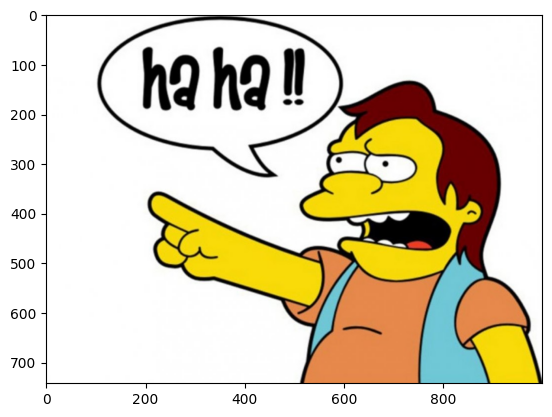

In [3]:
try: # запусти код
    n = int(input("Please enter an integer: "))
    print(1 / n)
except ZeroDivisionError: # если встретил вот эту ошибку (ошибка - это класс)
    plt.imshow(image)
    plt.show()

О! Заметили, что у нас еще бывают другие ошибки? И мы их тоже хотим обработать!

Please enter an integer: y


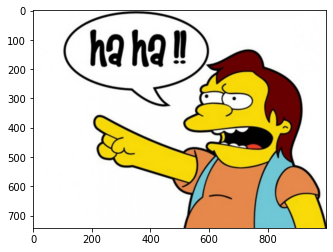

In [ ]:
try: # запусти код
    n = int(input("Please enter an integer: "))
    print(1 / n)
except ZeroDivisionError: # если встретил вот эту ошибку (ошибка - это класс)
    plt.imshow(image)
    plt.show()
except ValueError:
    plt.imshow(image)
    plt.show()
except:
    print("Haha")

Но так неудобно, можно объединить

In [ ]:
try: # запусти код
    n = int(input("Please enter an integer: "))
    print(1 / n)
except (ZeroDivisionError, ValueError): # если встретил вот эту ошибку (ошибка - это класс)
    plt.imshow(image)
    plt.show()

Please enter an integer: 5
0.2


Окей, а что если мы вот сделали кусок кода и хотим после обработки ошибки сделать что-нибудь еще? Для этого есть else и finally

* else - выполняет код, если ошибок в итоге не возникло

* finally - выполняет код в любом случае

Please enter an integer: 0


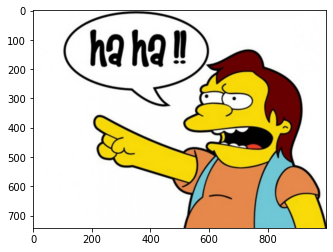

LOL


In [ ]:
try: # запусти код
    n = int(input("Please enter an integer: "))
    print(1 / n)
except (ZeroDivisionError, ValueError): # если встретил вот эту ошибку (ошибка - это класс)
    plt.imshow(image)
    plt.show()
else:
    print("Good job")
finally:
    print("LOL")

А что происходит, если внутри обработки ошибки случаются ошибки? Давайте попробуем:

Please enter an integer: 0


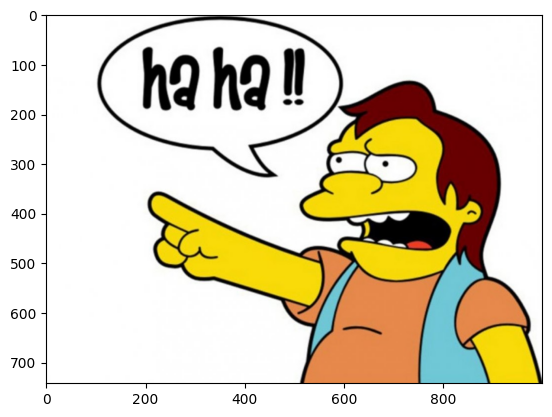

LOL


ValueError: ignored

In [6]:
try: # запусти код
    n = int(input("Please enter an integer: "))
    print(1 / n)
except ZeroDivisionError: # если встретил вот эту ошибку (ошибка - это класс)
    plt.imshow(image)
    plt.show()
    k = int("abc")
except ValueError:
    print("Caught ya")
else:
    print("Good job")
finally:
    print("LOL")

Какие вообще бывают ошибки? Ну давайте посмотрим:

In [ ]:
import builtins
dir(builtins) # тут не только ошибки, но вообще все встроенные объекты

А что еще? :)

* Можно создать свое собственное исключение (и его подымать)

* Можно смотреть на значения исключения

У каждого исключения есть еще внутри значения, которые также можно выводить

In [ ]:
try: # запусти код
    n = int(input("Please enter an integer: "))
    print(1 / n)
except (ZeroDivisionError, ValueError) as e: # если встретил вот эту ошибку (ошибка - это класс)
    print(e) #внутри находится сообщение с тем, а что случилось-то
finally:
    print("LOL")

Please enter an integer: 0
division by zero
LOL


In [ ]:
try: # запусти код
    n = int(input("Please enter an integer: "))
    print(1 / n)
    raise ZeroDivisionError()
except (ZeroDivisionError, ValueError) as e: # если встретил вот эту ошибку (ошибка - это класс)
    print(e) #внутри находится сообщение с тем, а что случилось-то
finally:
    print("LOL")

Please enter an integer: 9
0.1111111111111111

LOL


In [ ]:
class MyException(Exception): #вообще исключения - это класс, который наследуется от класса Exception (логично, правда?)
    pass #здесь внутри можно сделать обработку, но об этом будет дальше

raise MyException("I can't take it anymore!")

MyException: ignored

In [ ]:
try:
    raise Exception("I can't take it anymore!")
except Exception as e:
    print(e)

I can't take it anymore!


И последнее. Допустим, что мы с вами тестируем какую-нибудь систему и собираем ошибки для того, чтобы потом их исследовать:

In [7]:
a = [1, 0, 0, 5]
exs = []
for i, k in enumerate(a):
    try:
        res = 1 / k
    except Exception as e:
        exs.append(e)

print(exs) #а что, а где..

[ZeroDivisionError('division by zero'), ZeroDivisionError('division by zero')]


Вот по таким ответам непонятно, что случилось. Так вот, для исключений можно добавлять комментарии! (Но только с версии Python 3.11)

In [9]:
!python --version

Python 3.10.12


In [11]:
!pip python --upgrade

ERROR: unknown command "python"


In [8]:
a = [1, 0, 0, 5]
exs = []
for i, k in enumerate(a):
    try:
        res = 1 / k
    except Exception as e:
        e.add_note(f"caught with value {k}, iteration {i + 1}")
        exs.append(e)

print(exs)

AttributeError: ignored

## Logging

Одна из вещей, которая ходит рядом с обработкой ошибок - это логирование, которое нужно, дабы следить за работой. Ведь если мы даже ошибку обработали, код работает, все славно, сам факт наличия ошибки может нас о чем-нибудь предупредить...

Тем более, что в продовых системах вы не сделаете простой print)

Мы поговорим о встроенной библиотеке [logging](https://docs.python.org/3/library/logging.html#)

In [1]:
import logging

Внутри бибилиотеки существует 5 уровней логирования (в скобочках - уровень критичности, чем выше - тем больше крит):

* debug(10) - отладка, самый низкий приоритет

* info(20) - вывод данных, где все ок (схожий с уровнем отладки), все происходит нормально

* warning(30) - предупреждение (и дефолтный уровень логирования)

* error(40) - произошла какая-то ошибка, возможно на нее стоит посмотреть

* critical(50) - случилось что-то оооочень плохое (что точно нужно исправить, пока не взорвалось)

Каждый из них - это своя функция (по дефолту в консоли вы увидите только сообщения уровня warning и выше)

In [3]:
logging.debug("Debugging")
logging.info("Information")
logging.warning("Warning")
logging.error("ERROR")
logging.critical("AAAAAA")

ERROR:root:ERROR
CRITICAL:root:AAAAAA


Весь дальнейший код будем делать уже не в ноутбуке, потому что хоть ноутбук - это славно, но он способен не на все)

Итак, чаще всего мы хотим иметь не просто вывод в консоль, а иметь отдельный файл, внутри которого будет храниться вся информация. Для этого нужно настроить наш логгер. Все это будет внутри [basicConfig()](https://docs.python.org/3/library/logging.html#logging.basicConfig):

In [ ]:
logging.basicConfig(level=logging.INFO, filename="py_log.log",filemode="w")

# level - это уровень, с которого мы делаем записи в логгер (уровни называются как и сами функции, только Капсом. Есть еще logging.NOTSET - это уровень 0, записывай все)
# filename - куда все писать (если нет, создаст)
# filemode - по дефолту стоит "a" - добавить в конец, если поставить "w" - то будем замылять

Давайте разберем получившееся сообщение:

```
INFO:root:Information
WARNING:root:Warning
ERROR:root:ERROR
CRITICAL:root:AAAAAA
```

Видим уровень:какой-то root:сообщение. Что такое root? Это название логгера (по дефолту logger называется root)

Окей, сообщения получили, можно как-то базово использовать, но пока лучше не стало. Не хватает какой-то базовой информации - а когда случилось, может еще что-то мы хотим добавить... Поэтому в basicConfig есть также форматирование сообщения, которое должно записываться

In [ ]:
logging.basicConfig(level=logging.INFO, filename="py_log.log",filemode="w",
                    format="%(asctime)s %(levelname)s %(message)s")

## Здесь используем некоторые имеющиеся данные логгера, подробнее про них https://docs.python.org/3/library/logging.html#logrecord-attributes


```
2023-09-21 17:16:42,863 INFO Information
2023-09-21 17:16:42,863 WARNING Warning
2023-09-21 17:16:42,863 ERROR ERROR
2023-09-21 17:16:42,863 CRITICAL AAAAAA
```

Ну вот, другое дело!

Давайте совмещать теперь с исключениями. Вернемся к нашему коду из прошлой секции и немного перепишем:

In [ ]:
try:
    n = int(input("Please enter an integer: "))
    res = 1 / n
    logging.info(f"Successful call: {n}, the result is {res}")
except (ZeroDivisionError, ValueError) as e:
    logging.error(e, exc_info=True) #Последнее - вывести сообщение из консоли, которое мы получаем
    logging.exception(e) #Можно вот так еще
finally:
    logging.info("LOL")

Итак, а теперь представим, что у нас большой проект. А это значит несколько модулей как минимум. Понятное дело, что иметь для них один логер - дело плохое, хочется иметь каждый для себя. Давайте создавать несколько подобных. Чтобы создать отдельный логер, используем getLogger(), который принимает в себя название логгера. По дефолту это root, можно назвать самостоятельно, но принято называть __ name __ (то есть по названию модуля). Если же сделать везде одинаково, то ничего понятно не будет...

Что важно знать при создании собственного логера? А то, что в нем есть несколько частей:

* Logger - сам логгер, который будет все делать (посылка сообщений)

* Handler - часть логгера, которая отвечает за обработку посланных сообщений (что и куда)

* Formatter - форматирование сообщения (как правильно вывести)

* Filter - дополнительно можно фильтровать сообщения (что выводить, а что не выводить)

Давайте на примере соберем:



In [ ]:
import logging
from logging import FileHandler, Formatter

d_log = logging.getLogger(__name__) # берем и создаем logger с нужным названием
d_log.setLevel(logging.INFO) # поставить уровень, с которого мы что-либо логируем
d_han = FileHandler(filename="py_log.log", mode="w") # Handler, коих много https://docs.python.org/3/library/logging.handlers.html, зависит от того куда логируем
d_han.setFormatter(Formatter(fmt="%(asctime)s %(name)s %(levelname)s %(message)s")) # форматирование

d_log.addHandler(d_han)

def good_division(n):
    try:
        res = 1 / n
        d_log.info(f"Successful call: {n}, the result is {res}")
    except (ZeroDivisionError, ValueError) as e:
        res = 0
        d_log.error(e, exc_info=True)
        d_log.exception(e)
    finally:
        d_log.info("LOL")
    return res

Что у нас получается? Нужно создавать везде такие логеры, дальше их помнить и с ними работать... Не совсем

Можно и так обойтись, а можно и сделать более извращенно, ведь логгер можно создавать с помощью словаря, сохранить его отдельно в какой-нибудь файле (типа settings) и вытащить оттуда!

Рассмотрим вот эту махину:

```
LOGGING_CONFIG = {
    'version': 1,
    'disable_existing_loggers': False,

    'formatters': {
        'default_formatter': {
            'format': '%(asctime)s %(name)s %(levelname)s %(message)s'
        },
    },

    'handlers': {
        'file_handler': {
            'class': 'logging.FileHandler',
            'formatter': 'default_formatter',
            'filename': 'py_log.log',
            'mode': 'w'
        },
    },

    'loggers': {
        'main': {
            'handlers': ['file_handler'],
            'level': 'INFO',
            'propagate': True
        },
        'division': {
            'handlers': ['file_handler'],
            'level': 'INFO',
            'propagate': True
        },
    }
}
```

## Птица дня

![](https://mtdata.ru/u16/photoE47C/20790968880-0/original.jpeg)

А это кетцаль (тревога: это не попугай!). Священная птица для майя и ацтеков (и в целом для мезоамериканских народов, не зря же Кетцалькоатль)

Их ловили, но никогда не убивали. Единственное, что от них было нужно - это красивые перья, которые использовались в качестве украшений и для ритуалов. Их перья были символом власти и сверхъестественного. Местные жители считают, что в неволе птица умирает от разрыва сердца

Во времена испанского правления в кетцаль был символом свободы для местных жителей и даже есть легенда, что его грудь и брюхо окрашены кровью павших борцов за независимость. И сейчас в Гватемале это государственный символ (и валюта)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Feather_headdress_Moctezuma_II.JPG/1920px-Feather_headdress_Moctezuma_II.JPG)